# Cellpose in Python

<div class="custom-button-row">
    <a 
        class="custom-button custom-download-button" href="../../../notebooks/05_segmentation/deep_learning/cellpose_notebook.ipynb" download>
        <i class="fas fa-download"></i> Download this Notebook
    </a>
    <a
    class="custom-button custom-download-button" href="https://colab.research.google.com/github/HMS-IAC/bobiac/blob/gh-pages/colab_notebooks/05_segmentation/deep_learning/cellpose_notebook.ipynb" target="_blank">
        <img class="button-icon" src="../../../_static/logo/icon-google-colab.svg" alt="Open in Colab">
        Open in Colab
    </a>
</div>

In [ ]:
# /// script
# requires-python = ">=3.12"
# dependencies = [
#     "matplotlib",
#     "tifffile",
#     "cellpose"
# ]
# ///

# Overview

In this section...

If you do not have an Apple Silicon Mac or a GPU we suggest to run this notebook in Google Colab. 

...

The images we will use for this section can be downloaded from the <a href="../../../_static/data/05_segmentation_cellpose.zip"> <i class="fas fa-download"></i> Cellpose Dataset</a>.

## Import Libraries

In [ ]:
import tifffile
from cellpose import core, io
import matplotlib.pyplot as plt

## Setup

In [8]:
io.logger_setup()  # run this to get printing of progress

print("GPU available:", core.use_gpu())

2025-07-10 14:05:06,563 [INFO] WRITING LOG OUTPUT TO /Users/ranit/.cellpose/run.log
2025-07-10 14:05:06,564 [INFO] 
cellpose version: 	4.0.6 
platform:       	darwin 
python version: 	3.13.0 
torch version:  	2.7.1
2025-07-10 14:05:06,570 [INFO] ** TORCH MPS version installed and working. **
GPU available: True


## Run Cellpose on A Sample Image

...

### Load the Image

...

In [12]:
image_path = "../../../_static/images/cellpose/cell_cellpose.tif"
image = tifffile.imread(image_path)

### Init the Model

...

In [13]:
from cellpose import core, io, models, plot
from natsort import natsorted

# Check if colab notebook instance has GPU access
if core.use_gpu():
    gpu = True
else:
    gpu = False
    raise ImportError("No GPU access, change your runtime")

# Initialize the Cellpose model
model = models.CellposeModel(gpu=gpu)

2025-07-10 14:07:42,895 [INFO] ** TORCH MPS version installed and working. **
2025-07-10 14:07:42,897 [INFO] ** TORCH MPS version installed and working. **
2025-07-10 14:07:42,897 [INFO] >>>> using GPU (MPS)
2025-07-10 14:07:44,437 [INFO] >>>> loading model /Users/ranit/.cellpose/models/cpsam


### Run Cellpose

...

In [14]:
channel = 0 # channel to use for cell detection, 0 cytoplasm, 1 nucleus

# Cellpose parameters
flow_threshold = 0.4
cellprob_threshold = 0.0 
tile_norm_blocksize = 0

masks, flows, styles = model.eval(
    image[channel],
    batch_size=32,
    flow_threshold=flow_threshold,
    cellprob_threshold=cellprob_threshold,
    normalize={"tile_norm_blocksize": tile_norm_blocksize},
)

### Display the Results

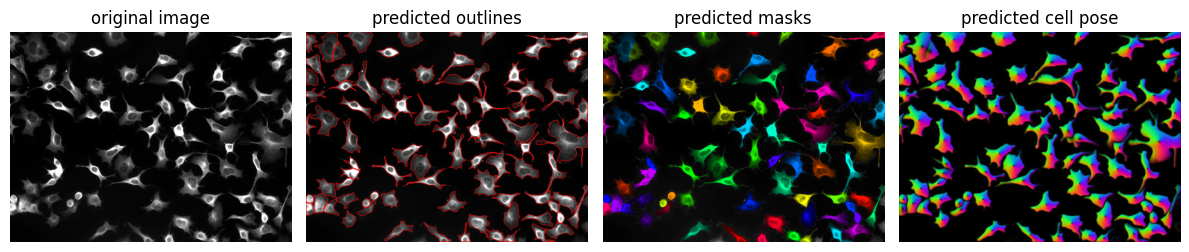

In [17]:
fig = plt.figure(figsize=(12, 5))
plot.show_segmentation(fig, image[channel], masks, flows[0])
plt.tight_layout()
plt.show()

## Run Cellpose on a Folder of Images

...

  0%|          | 0/24 [00:00<?, ?it/s]

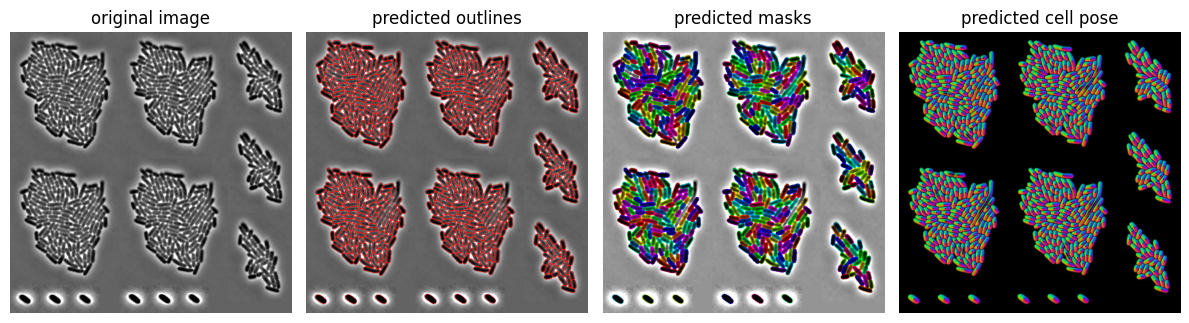

  4%|▍         | 1/24 [00:25<09:47, 25.55s/it]

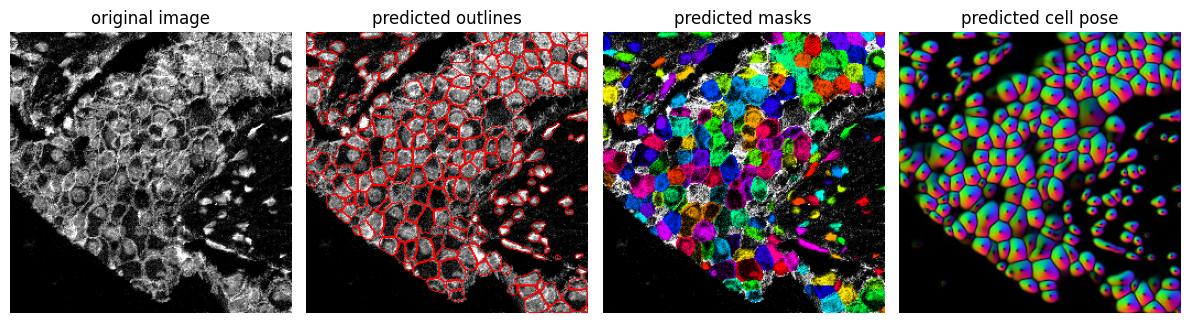

  8%|▊         | 2/24 [00:28<04:25, 12.08s/it]

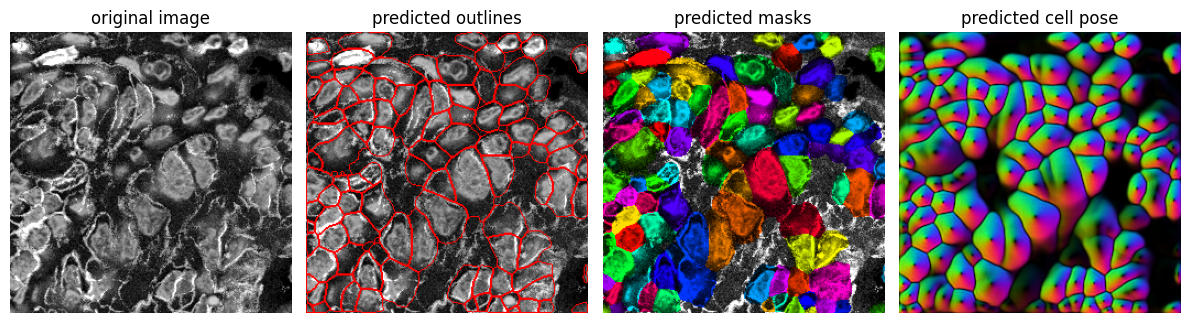

 12%|█▎        | 3/24 [00:29<02:34,  7.34s/it]

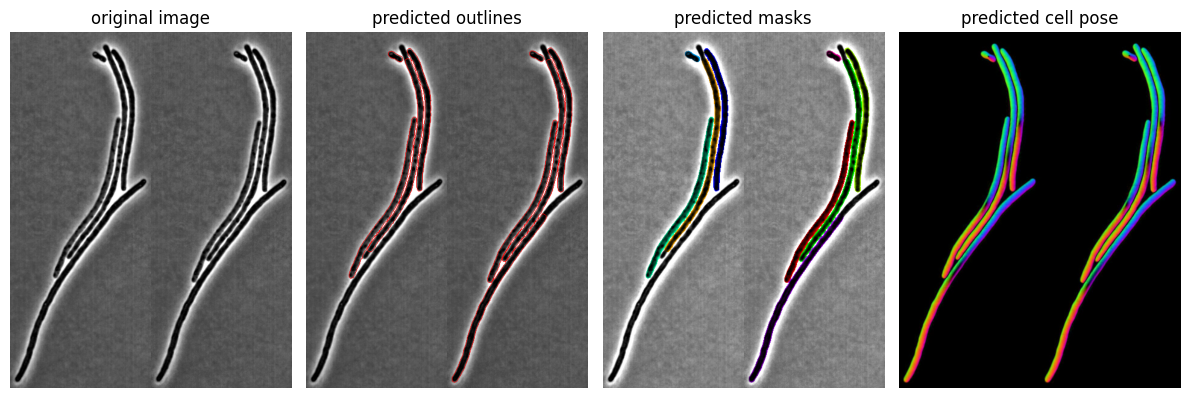

 17%|█▋        | 4/24 [00:34<02:04,  6.21s/it]

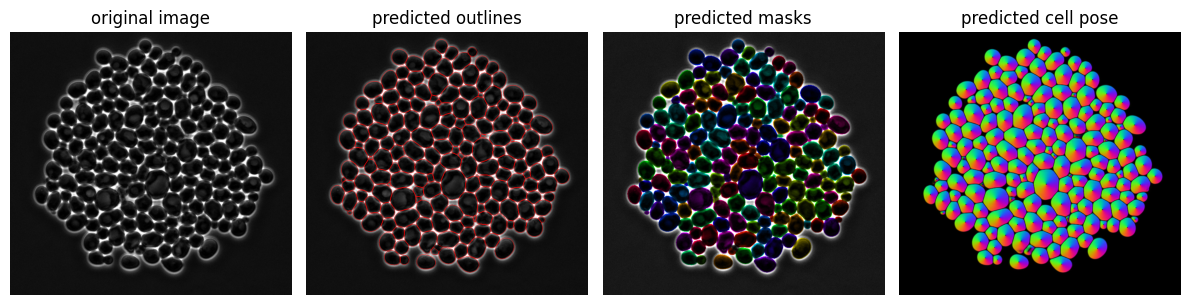

 21%|██        | 5/24 [01:31<07:46, 24.57s/it]

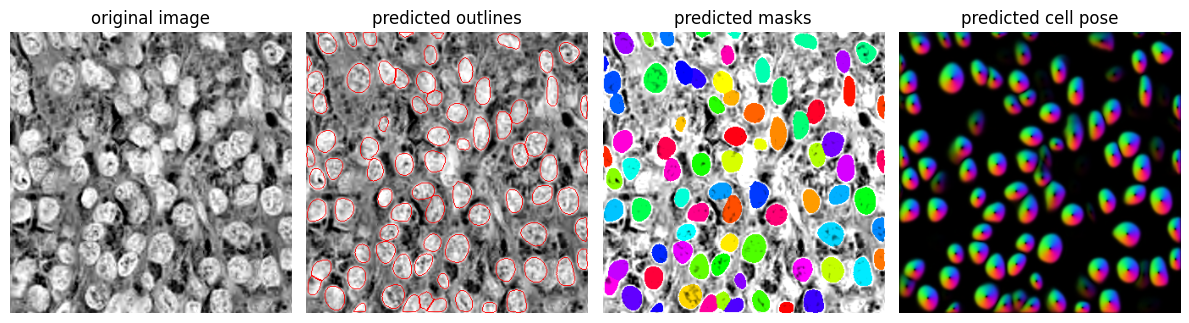

 25%|██▌       | 6/24 [01:33<05:04, 16.90s/it]

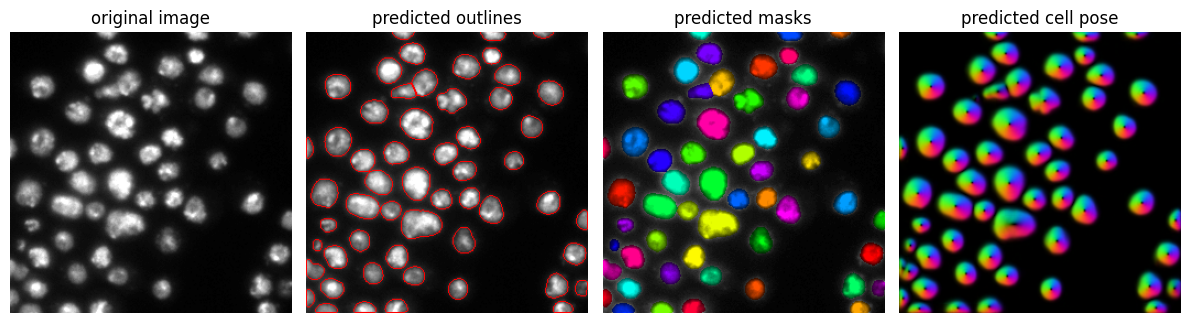

 29%|██▉       | 7/24 [01:35<03:22, 11.90s/it]

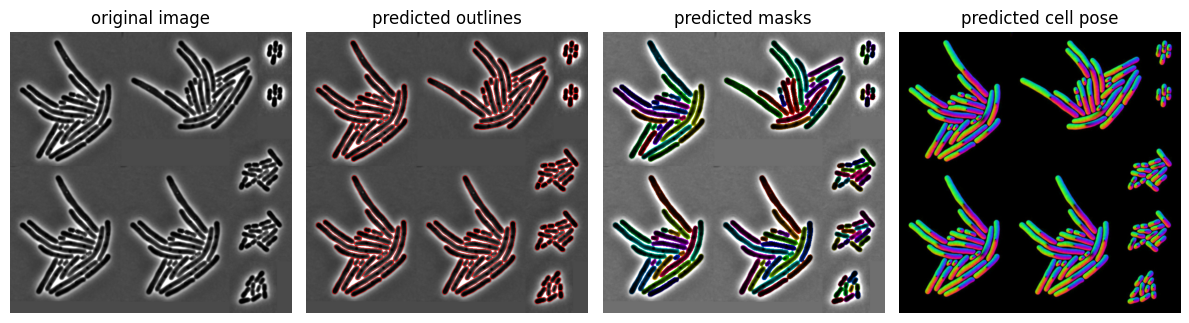

 33%|███▎      | 8/24 [01:42<02:44, 10.31s/it]

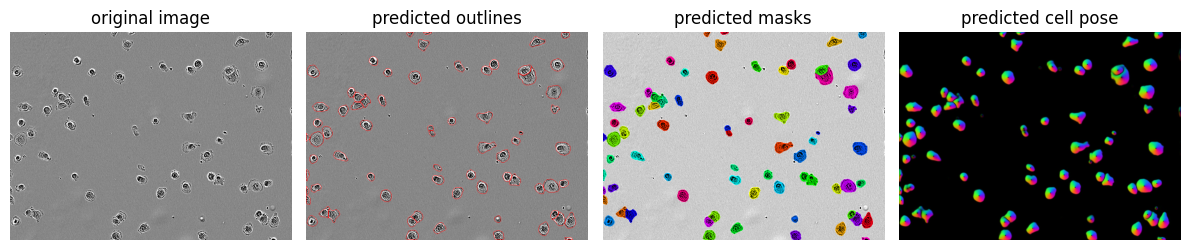

 38%|███▊      | 9/24 [02:01<03:19, 13.27s/it]

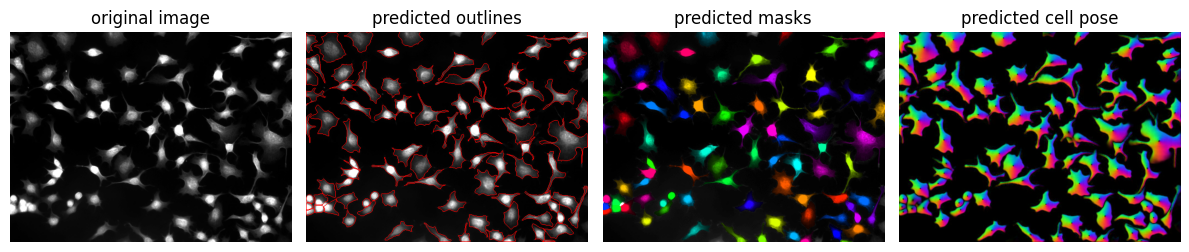

 42%|████▏     | 10/24 [02:16<03:10, 13.58s/it]

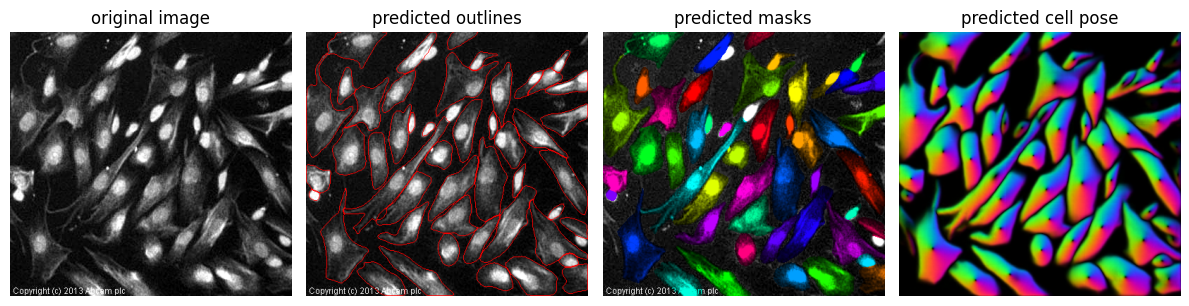

 46%|████▌     | 11/24 [02:18<02:10, 10.03s/it]

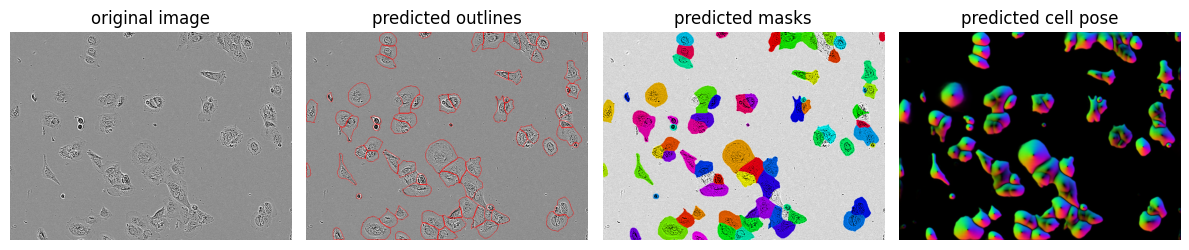

 50%|█████     | 12/24 [02:36<02:29, 12.47s/it]

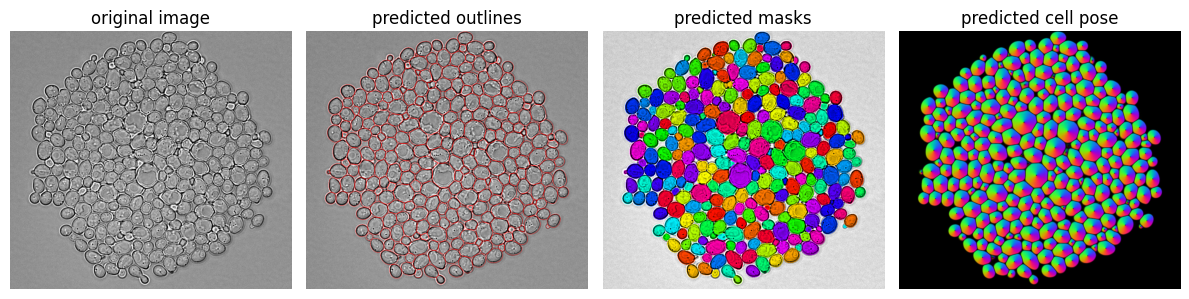

 54%|█████▍    | 13/24 [03:04<03:10, 17.31s/it]

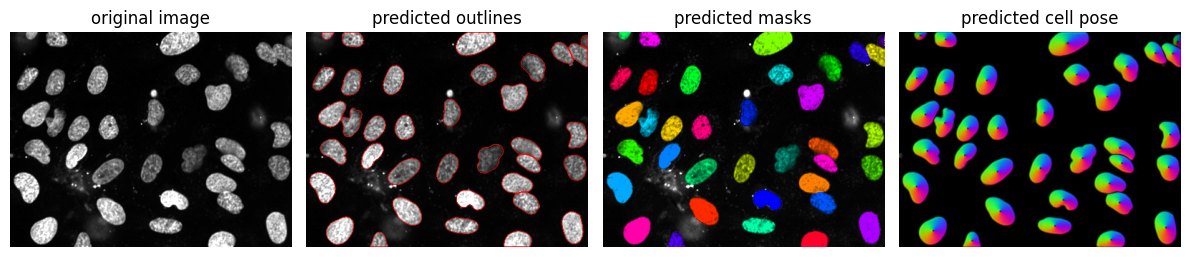

 58%|█████▊    | 14/24 [03:08<02:11, 13.15s/it]

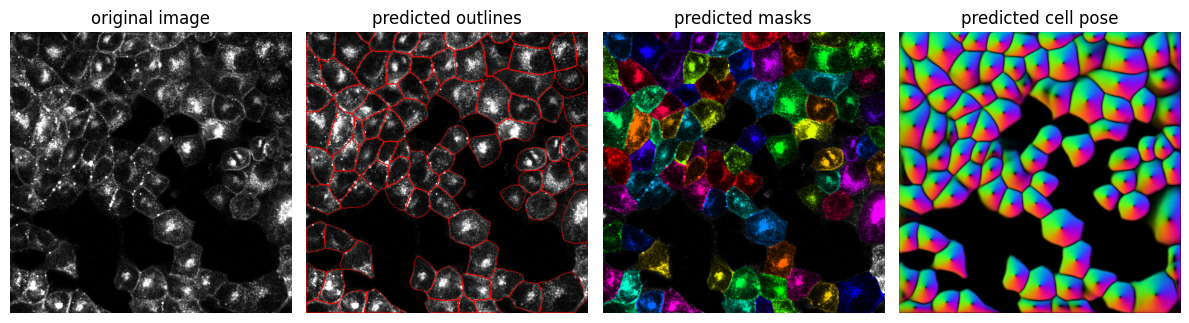

 62%|██████▎   | 15/24 [03:15<01:41, 11.32s/it]

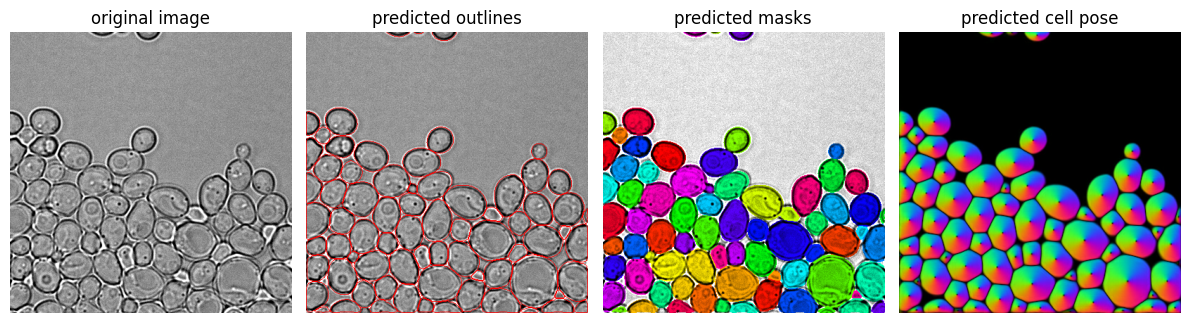

 67%|██████▋   | 16/24 [03:18<01:11,  8.94s/it]

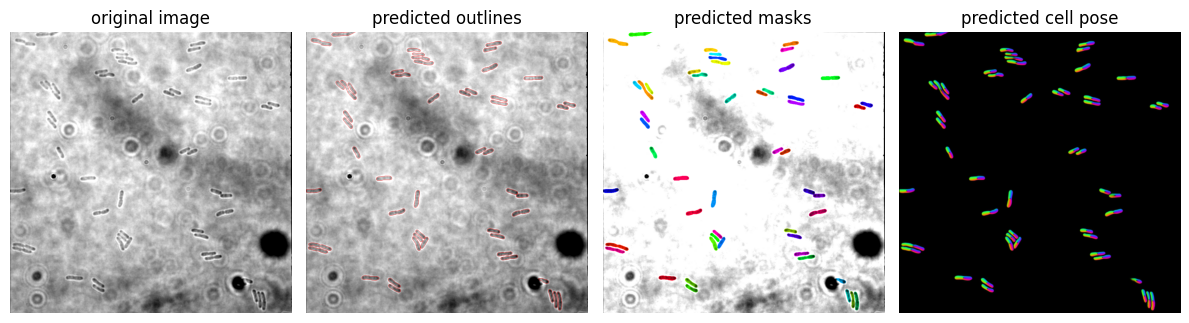

 71%|███████   | 17/24 [14:42<24:42, 211.81s/it]

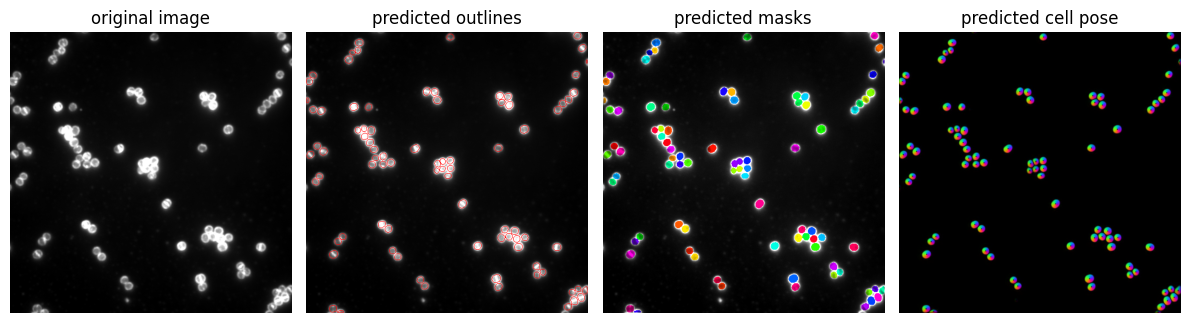

 75%|███████▌  | 18/24 [14:59<15:19, 153.32s/it]

In [ ]:
import tqdm
import os


FOLDER_PATH = "../../../_static/data/05_segmentation_cellpose"

# Read file names
files = [f for f in os.listdir(FOLDER_PATH) if f.endswith(".tif")]

# Run Cellpose on all images
for file in tqdm.tqdm(files):
    image_path = os.path.join(FOLDER_PATH, file)
    image = tifffile.imread(image_path)
    masks, flows, styles = model.eval(
        image,
        batch_size=32,
        flow_threshold=flow_threshold,
        cellprob_threshold=cellprob_threshold,
        normalize={"tile_norm_blocksize": tile_norm_blocksize},
    )

    # Display each image with its segmentation
    fig = plt.figure(figsize=(12, 5))
    plot.show_segmentation(fig, image, masks, flows[0])
    plt.tight_layout()
    plt.show()

    # Save the segmentation results
    output_file = file.replace(".tif", "_labeled_mask.tif")
    output_file = os.path.join(FOLDER_PATH, "masks", output_file)
    tifffile.imwrite(output_file, masks.astype("uint16"))    

TO REMOVE: <a href="https://colab.research.google.com/github/MouseLand/cellpose/blob/main/notebooks/test_Cellpose-SAM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>